# Aproximación de Raices en ecuaciones no lineales
Al momento de hablar de aproximación de raices, lo que se busca, es encontrar puntos aproximados de una función donde la variable dependiente de la misma, toma cero como valor. Esto es $f(x,\theta)=0$, donde $x={x_0, x_1, \dots, x_d}$ y $\theta={\theta_0, \theta_1, \dots, \theta_d}$.

Para encontrar raíces utilizando cualquiera de los métodos disponibles, lo primero que hay que hacer, es graficar la función en cuestión para poder determinar, si es posible, visualmente en que intervalo donde acotar la búsqueda. 

Por ejemplo, teniendo:

$f(x)=-26+85x-91x^2 +44x^3 -8x^4 + x^5$

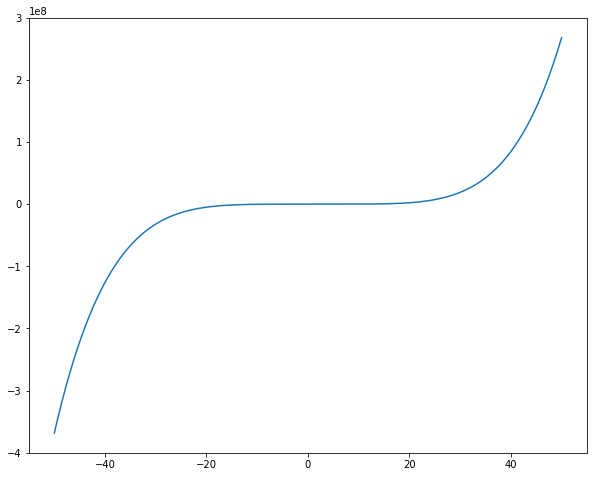

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Se cambia el tamaño por defecto de los plots
plt.rcParams['figure.figsize'] = [10.0, 8.0]

#Limites del grafico
x_lims = [-50,50]
#Puntos a evaluar
x = np.linspace(x_lims[0],x_lims[1],800)
y = -26+85*x-91*x**2+44*x**3-8*x**4+x**5

plt.plot(x,y, label='f(x)')
plt.show()

## Bisección
Ahora que visualmente podemos determinar un intervalo donde con seguridad podemos encontrar una raíz. Realizamos una pequeña implementación del método de bisección. Este es uno de los métodos más sencillos y de fácil intuición para resolver ecuaciones en una variable. Se basa en el  [teorema del valor intermedio (TVI)](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio), el cual establece que toda función continua f en un intervalo cerrado $[a,b]$ toma todos los valores que se hallan entre $f(a)$ y $f(b)$. Esto es, todo valor entre $f(a)$ y $f(b)$ es la imagen de al menos un valor en el intervalo $[a,b]$. En caso de que $f(a)$ y $f(b)$ tengan signos opuestos, el valor cero sería un valor intermedio entre $f(a)$ y $f(b)$, por lo que con certeza existe un $p$ en $[a,b]$ que cumple $f(p)=0$. De esta forma, se asegura la existencia de al menos una solución de la ecuación $f(x)=0$.

El método consiste en lo siguiente:
* Debe existir seguridad sobre la continuidad de la función $f(x)$ en el intervalo $[a,b]$.
* A continuación se verifica que $f(a)\cdot f(b)<0$. 
* Se calcula el punto medio $m$ del intervalo $[a,b]$ y se evalúa $f(m)$ si ese valor es igual a cero, ya hemos encontrado la raíz buscada
* En caso de que no lo sea, verificamos si $f(m)$ tiene signo opuesto con $f(a)$ o con $f(b)$
* Se redefine el intervalo $[a, b]$ como $[a, m]$ ó $[m, b]$ según se haya determinado en cuál de estos intervalos ocurre un cambio de signo
* Con este nuevo intervalo se continúa sucesivamente encerrando la solución en un intervalo cada vez más pequeño, hasta alcanzar la precisión deseada

En la siguiente figura se ilustra el procedimiento descrito.

![besection_method](img/10-bisection_method.png)

El método de bisección es menos eficiente que el método de Newton-Raphson, pero es mucho más seguro para garantizar la convergencia. Si f es una función continua en el intervalo [a, b] y f(a)f(b) < 0, entonces este método converge a la raíz de f.

Seudo código del método:

![algorithm_bisection](img/10-algorithm_bisection.png)

## Ejercicio 1: Implementar método de bisección

In [5]:
#Función utilizada para determinar si dos puntos tienen el mismo signo
def samesign(a, b):
    return a * b > 0
    
#Función que realiza la busqueda de la raiz por bisección en el rango de x [low,high]   
def bisect(func, low, high):    
    assert not samesign(func(low), func(high))
    
    midpoint = 0
    ## TODO implementar método de bisección

    return midpoint    

def f(x):
    return -26 + 85*x - 91*x**2 +44*x**3 -8*x**4 + x**5


%timeit x = bisect(f, 0, 1)
print(x, f(x))

## Newton-Raphson
El método de Newton-Raphson es un algoritmo para encontrar aproximaciones de los ceros o raíces de una función real. También puede ser usado para encontrar el máximo o mínimo de una función, encontrando los ceros de su primera derivada. En este ultimo caso, estariamos hablando de un caso de optimización.

El método de Newton-Raphson es un método abierto, en el sentido de que no está garantizada su convergencia global. La única manera de alcanzar la convergencia es seleccionar un valor inicial lo suficientemente cercano a la raíz buscada. Así, se ha de comenzar la iteración con un valor razonablemente cercano al cero (denominado punto de arranque o valor supuesto). La relativa cercanía del punto inicial a la raíz depende mucho de la naturaleza de la propia función; si ésta presenta múltiples puntos de inflexión o pendientes grandes en el entorno de la raíz, entonces las probabilidades de que el algoritmo diverja aumentan, lo cual exige seleccionar un valor supuesto cercano a la raíz. Una vez que se ha hecho esto, el método linealiza la función por la recta tangente en ese valor supuesto. La abscisa en el origen de dicha recta será, según el método, una mejor aproximación de la raíz que el valor anterior. Se realizarán sucesivas iteraciones hasta que el método haya convergido lo suficiente. Este método garantiza la convergencia en el caso de funciones convexas. 

![convex](img/10-convex_func.png)

## Ejercicio 2: Implementar método de Newton-Raphson

Sea $f:[a, b]\to R$ función derivable definida en el intervalo real $[a, b]$. Empezamos con un valor inicial $x_0$ y definimos para cada número natural $n$:

$$x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}$$

Donde $f'$ denota la derivada de $f$.

Nótese que el método descrito es de aplicación exclusiva para funciones de una sola variable con forma analítica o implícita conocible. Existen variantes del método aplicables a sistemas discretos que permiten estimar las raíces de la tendencia, así como algoritmos que extienden el método de Newton a sistemas multivariables, sistemas de ecuaciones, etcétera.

![iteration](img/10-newton_iteration.gif)

In [ ]:
# Importamos las librerias necesarias
import sys
import sympy as sy

def newt(x, fx, x0, precision=0.001):
    '''Funcion que busca las raices de fx utilizando el metodo de newton-raphson
        x -> variable
        fx -> función
        x0 -> punto inicial
        precision -> precisión deseada
        Retorna
        r -> Raiz aproximada
        iterations -> Iteraciones para encontrar la raiz
        e -> error = abs((r - x0) / r)
    '''
    # Error inicial
    e = np.inf
    iterations = 0
    #dfdx = ...

    ## TODO implementar newton-raphson
    
    return dfdx, r, iterations, e

# Definimos la variable y la función a aproximar
x = sy.Symbol('x')
fx = -26 + 85 * x - 91 * x ** 2 + 44 * x ** 3 - 8 * x ** 4 + x ** 5

dfdx, r, iterations, e = newt(x, fx, 10, 0.001)
print('f(x)=', fx)
print("f'(x)=", dfdx)
print('Raiz ', r, ' calculado despues de ', iterations, ' iteraciones')
print('Error ', e)

## Ejercicio 3 - Implementar Newton-Raphson para $n$ variables independientes:

$z = f(\theta)$ donde $\theta = \{\theta_0, \theta_1, \dots, \theta_n\}$

Probar la solucion en la función convexa $f(x,y)=x^2+y^2$